<a href="https://colab.research.google.com/github/charithcherry/Innomatics_Internship_APR_21/blob/main/Recommender%20System/Music_Rec_Sys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/musicdata/kaggle'


/content/drive/MyDrive/musicdata/kaggle


In [4]:
ls

kaggle_songs.txt                        MSDChallengeGettingstarted.pdf
kaggle_users.txt                        taste_profile_song_to_tracks.txt
kaggle_visible_evaluation_triplets.txt  unique_tracks.txt


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**VISIBLE EVALUTION TRIPLETS DATA**

In [7]:
triplets=pd.read_csv('kaggle_visible_evaluation_triplets.txt',sep='\t',names=['user_id','song_id','freq'])
triplets.head()

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


**DATA DESCRIPTION**

In [8]:
triplets.describe()

,freq
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [9]:
triplets.shape

(1450933, 3)

In [10]:
triplets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450933 entries, 0 to 1450932
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1450933 non-null  object
 1   song_id  1450933 non-null  object
 2   freq     1450933 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 33.2+ MB


**NULL and DUPLICATE VALUES**

In [11]:
triplets.isnull().sum()

user_id    0
song_id    0
freq       0
dtype: int64

In [12]:
sum(triplets.duplicated())

0

**UNIQUE TRACK DATA**

In [13]:
tracks_df=pd.read_csv('unique_tracks.txt',sep='<SEP>',names=['track_id','song_id','artist_name','release'])
tracks_df.head()

,track_id,song_id,artist_name,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [14]:
tracks_df.shape

(1000000, 4)

In [15]:
tracks_df.tail()

,track_id,song_id,artist_name,release
999995,TRYYYUS12903CD2DF0,SOTXAME12AB018F136,Kiko Navarro,O Samba Da Vida
999996,TRYYYJO128F426DA37,SOXQYIQ12A8C137FBB,Kuldeep Manak,Jago Chhadeo
999997,TRYYYMG128F4260ECA,SOHODZI12A8C137BB3,Gabriel Le Mar,Novemba
999998,TRYYYDJ128F9310A21,SOLXGOR12A81C21EB7,Elude,Faraday
999999,TRYYYVU12903CD01E3,SOWXJXQ12AB0189F43,Texta,Fernweh feat. Sektion Kuchikäschtli


**NULL AND DUPLICATE VALUES**

In [16]:
print("Number of null values \n{}.".format(tracks_df.isnull().sum()))

Number of null values 
track_id        0
song_id         0
artist_name     0
release        15
dtype: int64.


In [17]:
print("Number of duplicate values {}".format(sum(tracks_df.duplicated())))

Number of duplicate values 0


In [18]:
detail_df=tracks_df.dropna()

In [19]:
detail_df.shape

(999985, 4)

In [20]:
print("Number of Null values are \n{}".format(tracks_df.isnull().sum()))

Number of Null values are 
track_id        0
song_id         0
artist_name     0
release        15
dtype: int64


#**MERGING DATAFRAMES**

In [21]:
song_df=pd.merge(triplets, tracks_df.drop_duplicates(['song_id']), on='song_id', how='left')
song_df.head()


,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


In [22]:
song_df.shape

(1450933, 6)

#**Basic Statistics**

In [23]:
print('Total Data Points',song_df.shape[0])
print('Total NO of users',song_df['user_id'].unique().shape[0])
print('Total number of songs',song_df['song_id'].unique().shape[0])
print('Total number of Tracks',song_df['track_id'].unique().shape[0])


Total Data Points 1450933
Total NO of users 110000
Total number of songs 163206
Total number of Tracks 163206


In [24]:
print('Number of unique release',song_df['release'].unique().shape[0])
print('Number of unique artists',song_df['artist_name'].unique().shape[0])

Number of unique release 137623
Number of unique artists 28361


In [25]:
song_df.describe()

,freq
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


# Distribution of Frequency column

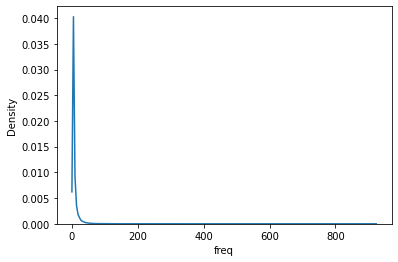

In [26]:
sns.kdeplot(data=song_df, x="freq")

# Number of songs listened per user

In [27]:
#groupby code
#using user_id,song_id
songs_per_user=song_df.groupby(['user_id'])['user_id'].value_counts()


In [28]:
songs_per_user

user_id                                   user_id                                 
00007a02388c208ea7176479f6ae06f8224355b3  00007a02388c208ea7176479f6ae06f8224355b3     9
00014a76ed063e1a749171a253bca9d9a0ff1782  00014a76ed063e1a749171a253bca9d9a0ff1782    11
00015189668691680bb1a2e58afde1541ec92ced  00015189668691680bb1a2e58afde1541ec92ced    17
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2  0001ff7aa2667c8d8b945317b88adaed1c0b9dc2     9
00020fcd8b01986a6a85b896ccde6c49f35142ad  00020fcd8b01986a6a85b896ccde6c49f35142ad    32
                                                                                      ..
fffdef71f13352e9cff769f1d96f5ccf90f8955e  fffdef71f13352e9cff769f1d96f5ccf90f8955e     7
fffe29116f96c97b47a5dabdd406784ad0ba6f30  fffe29116f96c97b47a5dabdd406784ad0ba6f30     6
fffe5b73c50c72ca9c54947efac1fcacf59c4a17  fffe5b73c50c72ca9c54947efac1fcacf59c4a17    23
fffed0bee753cd78494011b8b55dafd4f5c7e5ff  fffed0bee753cd78494011b8b55dafd4f5c7e5ff    13
ffff07d7d9bb187aa58c7b81b3d

In [29]:
songs_per_user.sort_values().head()

user_id                                   user_id                                 
336c306c5df497a9cb4067c14d5b840ba1a1e272  336c306c5df497a9cb4067c14d5b840ba1a1e272    5
47b83637c7726c40218552445e1dc9b906f0ad6d  47b83637c7726c40218552445e1dc9b906f0ad6d    5
5519a61514f2248435a70afad322568c1a1173eb  5519a61514f2248435a70afad322568c1a1173eb    5
ae7a9eaf03f35908b8ffc420241f99e9c6057bf2  ae7a9eaf03f35908b8ffc420241f99e9c6057bf2    5
18cb5d68334667324a9bac0a66f6579f34f43a31  18cb5d68334667324a9bac0a66f6579f34f43a31    5
Name: user_id, dtype: int64

In [30]:
songs_per_user.sort_values().tail()

user_id                                   user_id                                 
0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90  0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90    52
03ad93fdb01506ce205f4708decf8e4b1ae90fff  03ad93fdb01506ce205f4708decf8e4b1ae90fff    52
016a24e91a72c159a5048ab1b9b2ba5ce761b526  016a24e91a72c159a5048ab1b9b2ba5ce761b526    52
d30e18323f15426c3cdc8585252ed34459916f51  d30e18323f15426c3cdc8585252ed34459916f51    52
7d90be8dfdbde170f036ce8a4b915440137cb11c  7d90be8dfdbde170f036ce8a4b915440137cb11c    53
Name: user_id, dtype: int64

In [31]:
songs_per_user.describe()

count    110000.000000
mean         13.190300
std           8.070827
min           5.000000
25%           7.000000
50%          11.000000
75%          17.000000
max          53.000000
Name: user_id, dtype: float64

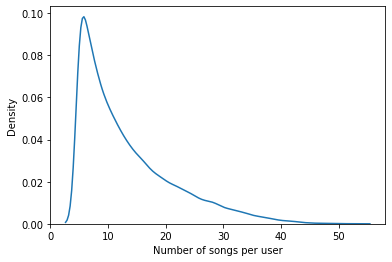

In [32]:
plt.xlabel('Number of songs per user')
sns.kdeplot(songs_per_user)
plt.show()

# Analysis of popular artist

In [33]:
#group by
#artistname and userid
artist_popularity=song_df.groupby(['artist_name'])['artist_name'].value_counts()


In [34]:
artist_popularity.sort_values().head()

artist_name                    artist_name                  
Özlem Tekin                    Özlem Tekin                      1
Chris Connelly and the Bells   Chris Connelly and the Bells     1
Mad Professor / Mafia & Fluxy  Mad Professor / Mafia & Fluxy    1
Maddox Brothers & Rose         Maddox Brothers & Rose           1
Madreblu                       Madreblu                         1
Name: artist_name, dtype: int64

In [35]:
artist_popularity.sort_values().tail()

artist_name             artist_name           
Jack Johnson            Jack Johnson               6784
Justin Bieber           Justin Bieber              7669
Florence + The Machine  Florence + The Machine     8213
Kings Of Leon           Kings Of Leon              8514
Coldplay                Coldplay                  12279
Name: artist_name, dtype: int64

In [36]:
# looking at cold play releases
song_df[song_df['artist_name']=='Coldplay']['release'].unique()

array(['Yellow', 'The Scientist', 'Fix You', "Don't Panic", 'Sparks',
       'Clocks', 'Life In Technicolor ii', 'Such A Rush',
       'Fix You (Live)', 'Speed Of Sound', 'Lost!',
       'God Put A Smile Upon Your Face', 'Brothers & Sisters',
       'A Rush Of Blood To The Head', 'Clocks (Live In Sydney)',
       'One I Love', 'For You', 'You Only Live Twice (Live From Norway)',
       'Shiver', 'Swallowed In The Sea', 'In My Place',
       'Postcards From Far Away', 'Glass Of Water',
       "Things I Don't Understand", 'Strawberry Swing', '42',
       'Til Kingdom Come', 'The Goldrush', 'X & Y', 'Life In Technicolor',
       'We Never Change', 'Bigger Stronger', 'What If', 'Trouble',
       "Everything's Not Lost (Includes Hidden Track 'Life Is For Living')",
       'Only Superstition', 'Politik', 'Careful Where You Stand',
       'Warning Sign', 'See You Soon', 'Spies', 'Cemeteries Of London',
       'A Whisper', 'A Message', 'Square One', 'Low', 'I Bloom Blaum',
       'I Ran Away',

In [37]:
# looking at justin beiber releases
song_df[song_df['artist_name']=='Justin Bieber']['release'].unique()

array(['Somebody To Love', 'Down To Earth', 'One Time', 'U Smile',
       'Favorite Girl', 'Love Me', 'Common Denominator',
       'Never Let You Go', 'Stuck In The Moment', 'Up',
       'One Less Lonely Girl', 'That Should Be Me', 'Bigger',
       'Runaway Love'], dtype=object)

In [38]:
sorted_artist_popularity=artist_popularity.sort_values(ascending=False)

Text(0.5, 1.0, 'popularity and artist')

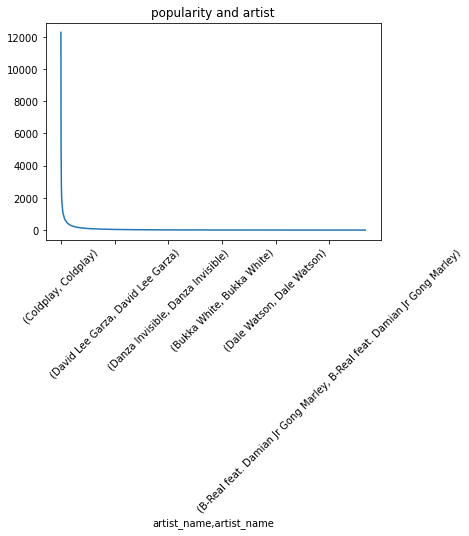

In [39]:
# plotting of popularity and artist

sorted_artist_popularity.plot.line()
plt.xticks(rotation=45)
plt.title('popularity and artist')

# Analysis of popularity song

In [40]:
# using release and userid
song_popularity=song_df.groupby(['release'])['release'].value_counts()


In [41]:
song_popularity.sort_values().head()

release                           release                         

Ef Ég Hefði Aldrei...            
Ef Ég Hefði Aldrei...              1
Making Love                       Making Love                         1
Making Friends and Acquaintances  Making Friends and Acquaintances    1
Making Flippy Floppy              Making Flippy Floppy                1
Making Dens                       Making Dens                         1
Name: release, dtype: int64

In [42]:
song_popularity.sort_values().tail()

release                         release                       
Revelry                         Revelry                           3672
Dog Days Are Over (Radio Edit)  Dog Days Are Over (Radio Edit)    3780
You're The One                  You're The One                    4270
Undo                            Undo                              4483
Sehr kosmisch                   Sehr kosmisch                     5043
Name: release, dtype: int64

In [43]:
sorted_song_popularity=song_popularity.sort_values(ascending=False)

In [44]:
# plot betweeen popularity and song

Text(0.5, 1.0, 'popularity and song')

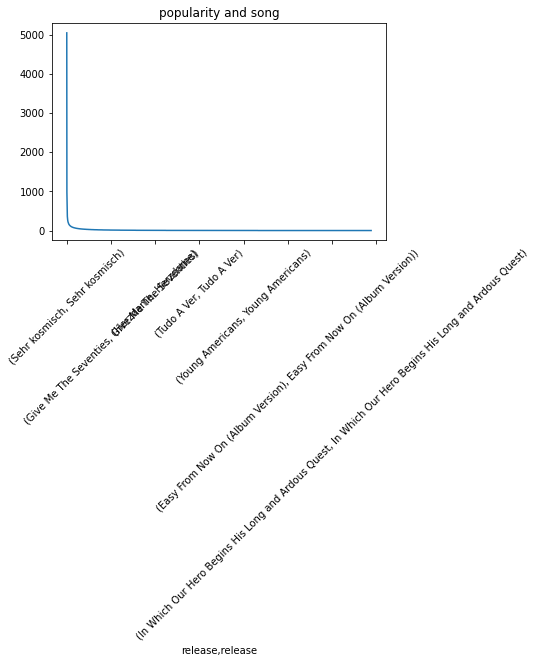

In [45]:
sorted_song_popularity.plot.line()
plt.xticks(rotation=45)
plt.title('popularity and song')

In [46]:
song_df.columns

Index(['user_id', 'song_id', 'freq', 'track_id', 'artist_name', 'release'], dtype='object')

In [47]:
repeated=song_df.groupby(['freq'])['song_id'].value_counts()

In [48]:
repeated

freq  song_id           
1     SOFRQTD12A81C233C0    2149
      SOAXGDH12A8C13F8A1    1693
      SOAUWYT12A81C206F1    1597
      SONYKOW12AB01849C9    1517
      SOSXLTC12AF72A7F54    1516
                            ... 
537   SOFVLYV12A8C145D8F       1
582   SONGOJV12AF729AEBD       1
597   SOAOXTG12A67021AA7       1
646   SOPMHHE12AB01845F6       1
923   SOXTUWG12AB018A2E2       1
Name: song_id, Length: 406254, dtype: int64

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000., 400000., 450000.]),
 <a list of 11 Text major ticklabel objects>)

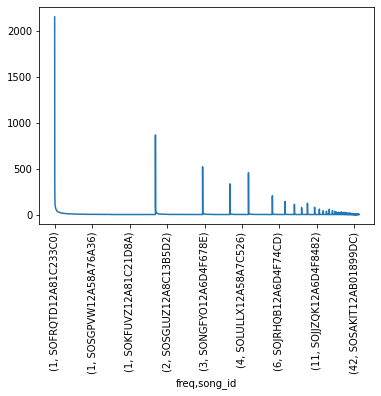

In [49]:
repeated.plot.line()
plt.xticks(rotation=90)

In [50]:
repeated.dtype

dtype('int64')

In [51]:
song_df.columns

Index(['user_id', 'song_id', 'freq', 'track_id', 'artist_name', 'release'], dtype='object')

In [52]:
song_grouped=song_df.groupby(['release']).agg({'freq':'count'}).reset_index()

In [53]:
song_grouped.head()

,release,freq
0,Ef Ég Hefði Aldrei...,1
1,Light Mass Prayers,4
2,"The Arsonist Story"": Evil Craves Attention/O...",1
3,Ég Átti Gráa Æsku,4
4,(Jack The Stripper),2


In [54]:
grouped_sum=song_grouped['freq'].sum()
song_grouped['percentage']=(song_grouped['freq']/grouped_sum)*100
song_grouped.sort_values(['freq','release'],ascending=[0,1])

,release,freq,percentage
98812,Sehr kosmisch,5043,0.347570
125393,Undo,4483,0.308974
136066,You're The One,4270,0.294294
28716,Dog Days Are Over (Radio Edit),3780,0.260522
93984,Revelry,3672,0.253079
...,...,...,...
137608,Último Desejo,1,0.000069
137610,Über Grenzen Geh'n,1,0.000069
137612,Übers Geld (Skit),1,0.000069
137614,Üdvözöl A Pokol,1,0.000069


#**POPULARITY RECOMMENDER SYSTEM**



In [56]:
class popularity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.popularity_recommendations = None
        
    #Create the popularity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

        #Get a count of user_ids for each unique song as recommendation score
        train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
        train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
    
        #Sort the songs based upon recommendation score
        train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])
    
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)

    #Use the popularity based recommender system model to
    #make recommendations
    def recommend(self, user_id):    
        user_recommendations = self.popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['user_id'] = user_id
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations
    

In [57]:
pr=popularity_recommender_py()

In [58]:
pr.create(song_df,'user_id','release')

In [59]:
pr.recommend(song_df['user_id'][9])

,user_id,release,score,Rank
98812,d7083f5e1d50c264277d624340edaaf3dc16095b,Sehr kosmisch,5043,1.0
125393,d7083f5e1d50c264277d624340edaaf3dc16095b,Undo,4483,2.0
136066,d7083f5e1d50c264277d624340edaaf3dc16095b,You're The One,4270,3.0
28716,d7083f5e1d50c264277d624340edaaf3dc16095b,Dog Days Are Over (Radio Edit),3780,4.0
93984,d7083f5e1d50c264277d624340edaaf3dc16095b,Revelry,3672,5.0
98585,d7083f5e1d50c264277d624340edaaf3dc16095b,Secrets,3456,6.0
49061,d7083f5e1d50c264277d624340edaaf3dc16095b,Horn Concerto No. 4 in E flat K495: II. Romanc...,3272,7.0
47683,d7083f5e1d50c264277d624340edaaf3dc16095b,Hey_ Soul Sister,2791,8.0
37656,d7083f5e1d50c264277d624340edaaf3dc16095b,Fireflies,2745,9.0
121358,d7083f5e1d50c264277d624340edaaf3dc16095b,Tive Sim,2669,10.0


**The above list is the popular songs to be recommended to the user 9 with ID:'cd4321d8fd42ba44996e7f34c2f6404cf5884696'**

#**Item Similarity Recommendation**

In [60]:
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.songs_dict = None
        self.rev_songs_dict = None
        self.item_similarity_recommendations = None
        
    #Get unique items (songs) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
        
    #Get unique users for a given item (song)
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
        
    #Get unique items (songs) in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_songs, all_songs):
            
        ####################################
        #Get users for all songs in user_songs.
        ####################################
        user_songs_users = []        
        for i in range(0, len(user_songs)):
            user_songs_users.append(self.get_item_users(user_songs[i]))
            
        ###############################################
        #Initialize the item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)
           
        #############################################################
        #Calculate similarity between user songs and all unique songs
        #in the training data
        #############################################################
        for i in range(0,len(all_songs)):
            #Calculate unique listeners (users) of song (item) i
            songs_i_data = self.train_data[self.train_data[self.item_id] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            
            for j in range(0,len(user_songs)):       
                    
                #Get unique listeners (users) of song (item) j
                users_j = user_songs_users[j]
                    
                #Calculate intersection of listeners of songs i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_songs, user_songs):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user songs.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['user_id', 'song', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pandas.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no songs for training the item similarity based recommendation model.")
            return -1
        else:
            return df
 
    #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
        
        ########################################
        #A. Get all unique songs for this user
        ########################################
        user_songs = self.get_user_items(user)    
            
        print("No. of unique songs for the user: %d" % len(user_songs))
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_songs = item_list
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
         
        return df_recommendations

In [64]:
ir = item_similarity_recommender_py()
ir.create(song_df, 'user_id', 'release')

In [65]:
user_items = ir.get_user_items(song_df['user_id'][5])


In [66]:
# display user songs history
for user_item in user_items:
    print(user_item)

You're The One
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)
Tive Sim
Catch You Baby (Steve Pitron & Max Sanna Radio Edit)
El Cuatrero
Unite (2009 Digital Remaster)


In [69]:
# give song recommendation for that user
ir.recommend(song_df['user_id'][5])



In [69]:
ir.get_similar_items(['Oliver James - Fleet Foxes', 'The End - Pearl Jam'])
